In [1]:
import csv
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
# Borrowed from stack exchange.
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
ls ../data

538_approval_polllist.csv
538_approval_topline.csv
Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv
Public_Health_Statistics-_Selected_underlying_causes_of_death_in_Chicago__2006___2010.csv
TIF_Funding_Sources_and_Uses_by_TIF__Fiscal_Year__and_Type.csv
__pycache__/
data_processing.py
dkos18.csv
generic_polllist.csv*
generic_topline.csv*
pollster-ratings.csv
pollster-ratings_528csv.csv
raw-polls_528.csv
special-elections_538.csv
standardized_report.csv


In [5]:
dfile = '../data/dkos18.csv'
dfile2 = '../data/special-elections_538.csv'

In [6]:
dfkos = pd.read_csv(dfile,parse_dates=True,date_parser='date')
df538 = pd.read_csv(dfile2, parse_dates=True)

In [7]:
dfkos.head()

,date,state,District,held_by,winner,18_d_vshare,18_r_vshare,18_marg,16_clinton,16_trump,16_margin,16_marg_diff,12_obama,12_romney,12_margin,12_marg_diff
0,1-May-18,FL,HD-39,(R),(R),0.40,0.60,-0.20,0.39,0.58,-0.19,-0.01,0.43,0.56,-0.12,-0.07
1,1-May-18,FL,HD-114,(D),(D),0.51,0.47,0.04,0.56,0.42,0.14,-0.10,0.50,0.49,0.01,0.03
2,24-Apr-18,AZ,AZ-08,(R),(R),0.47,0.52,-0.05,0.37,0.58,-0.21,0.16,0.37,0.62,-0.25,0.20
3,24-Apr-18,NY,SD-32,(D),(D),0.89,0.02,0.86,0.93,0.05,0.88,-0.02,0.97,0.03,0.94,-0.07
4,24-Apr-18,NY,SD-37,(D),(D),0.57,0.43,0.15,0.59,0.38,0.22,-0.07,0.54,0.45,0.09,0.06


In [8]:
df538.head()

,date,state,istrict,median_inc,%_bach_degree,clinton_over_BO,18_over_lean
0,3/27/18,Alabama,HD-21,65548.0,0.42,0.06,0.24
1,3/13/18,Pennsylvania,18th CD,62283.0,0.35,-0.03,0.22
2,3/13/18,Tennessee,SD-14,48252.0,0.22,-0.08,0.01
3,3/6/18,Oklahoma,HD-51,57202.0,0.18,-0.08,0.21
4,2/27/18,Kentucky,HD-89,37858.0,0.16,-0.05,0.29


In [47]:
print(df538.shape)
print(dfkos.shape)

(200, 8)
(107, 16)


In [32]:
# Fix typo in 538 dataframe
df538['District'] = df538['istrict']
df538.drop('istrict', inplace=True, axis=1)

# To datetime
dfkos['date']=pd.to_datetime(dfkos['date'], infer_datetime_format=True)
df538['date']=pd.to_datetime(df538['date'], infer_datetime_format=True)

# Create an interaction variable to play with. Education level * income
df538['edu_x_inc'] = df538['%_bach_degree']*df538['median_inc']
df538.head()

,date,state,median_inc,%_bach_degree,clinton_over_BO,18_over_lean,edu_x_inc,District
0,2018-03-27,Alabama,65548.0,0.42,0.06,0.24,27530.16,HD-21
1,2018-03-13,Pennsylvania,62283.0,0.35,-0.03,0.22,21799.05,18th CD
2,2018-03-13,Tennessee,48252.0,0.22,-0.08,0.01,10615.44,SD-14
3,2018-03-06,Oklahoma,57202.0,0.18,-0.08,0.21,10296.36,HD-51
4,2018-02-27,Kentucky,37858.0,0.16,-0.05,0.29,6057.28,HD-89


Text(0.5,1,'HRC Margin & Obama 2012 Margin Plotted Against Dem Special Election Margin')

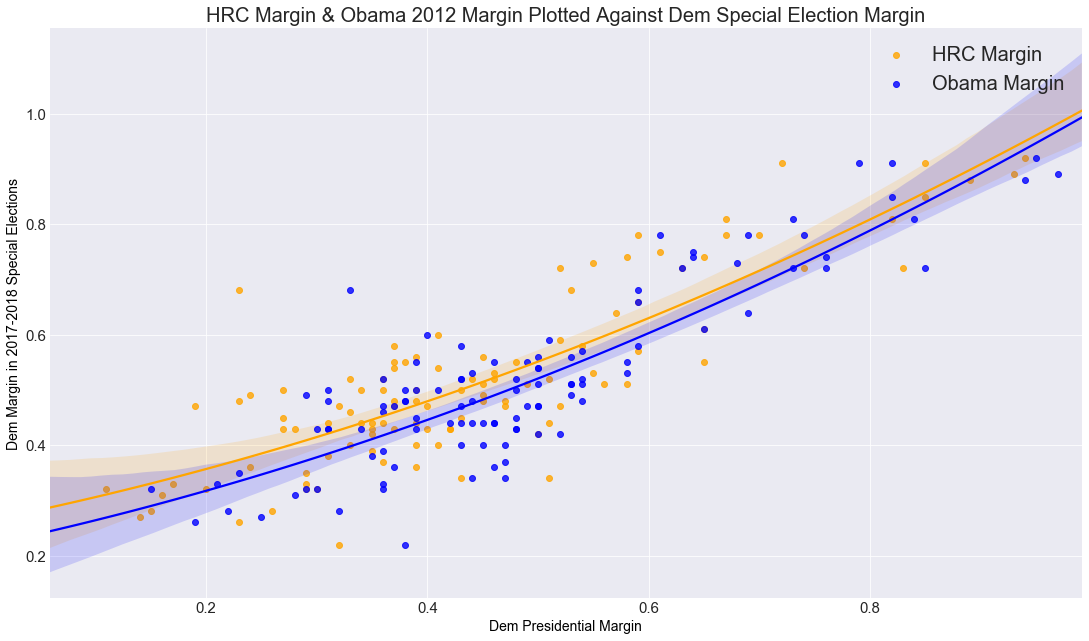

In [21]:
hrc = sns.regplot(x='16_clinton', y='18_d_vshare', data=dfkos, color='orange', scatter=True, marker='o', order=2, 
            label='HRC Margin')
bo = sns.regplot(x='12_obama', y='18_d_vshare', data=dfkos, color='blue', scatter=True, marker='o', order=2, 
           label='Obama Margin')
plt.xlabel('Dem Presidential Margin', fontsize=14, color='black')
plt.ylabel('Dem Margin in 2017-2018 Special Elections', fontsize=14, color='black')
plt.legend(fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.title("HRC Margin & Obama 2012 Margin Plotted Against Dem Special Election Margin", fontsize=20)

In [11]:
dfkos.head()

,date,state,District,held_by,winner,18_d_vshare,18_r_vshare,18_marg,16_clinton,16_trump,16_margin,16_marg_diff,12_obama,12_romney,12_margin,12_marg_diff
0,2018-05-01,FL,HD-39,(R),(R),0.40,0.60,-0.20,0.39,0.58,-0.19,-0.01,0.43,0.56,-0.12,-0.07
1,2018-05-01,FL,HD-114,(D),(D),0.51,0.47,0.04,0.56,0.42,0.14,-0.10,0.50,0.49,0.01,0.03
2,2018-04-24,AZ,AZ-08,(R),(R),0.47,0.52,-0.05,0.37,0.58,-0.21,0.16,0.37,0.62,-0.25,0.20
3,2018-04-24,NY,SD-32,(D),(D),0.89,0.02,0.86,0.93,0.05,0.88,-0.02,0.97,0.03,0.94,-0.07
4,2018-04-24,NY,SD-37,(D),(D),0.57,0.43,0.15,0.59,0.38,0.22,-0.07,0.54,0.45,0.09,0.06


In [12]:
dfkos.columns

Index(['date', 'state', 'District', 'held_by', 'winner', '18_d_vshare',
       '18_r_vshare', '18_marg', '16_clinton', '16_trump', '16_margin',
       '16_marg_diff', '12_obama', '12_romney', '12_margin', '12_marg_diff'],
      dtype='object')

In [13]:
dfkos.shape

(107, 16)

Text(0.5,1,'Romney & Trump Margin Plotted Against Republican Special Election Performance')

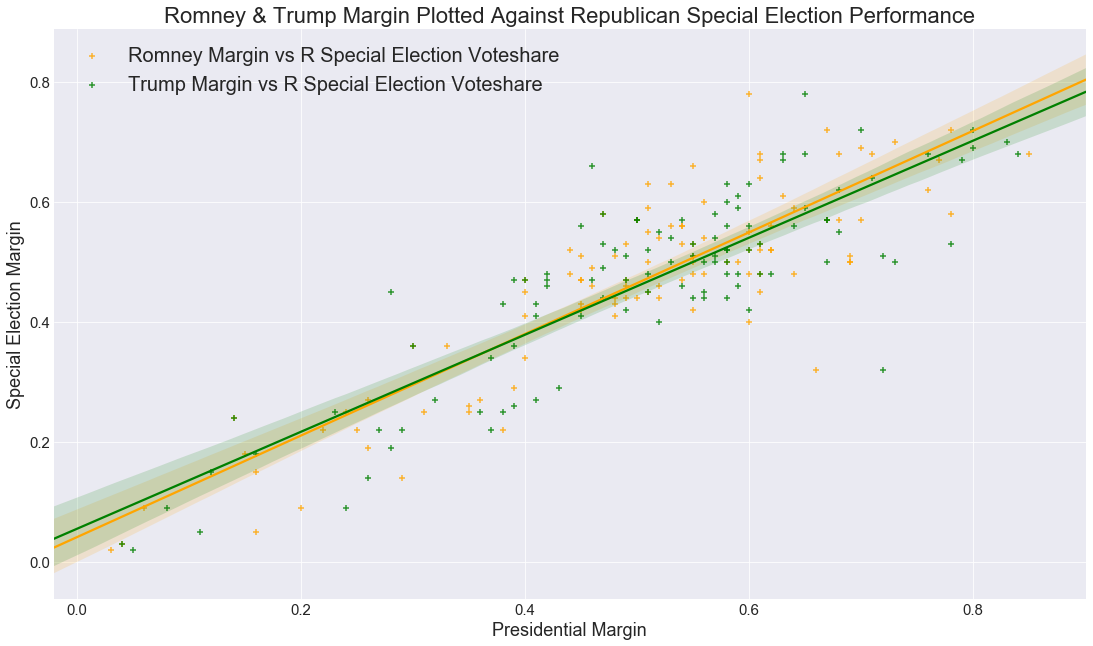

In [25]:
ROMNEY = sns.regplot(x='12_romney', y='18_r_vshare', data=dfkos, color='orange', scatter=True, marker='+', 
            order=1, label="Romney Margin vs R Special Election Voteshare")
TRUMP = sns.regplot(x='16_trump', y='18_r_vshare', data=dfkos, color='green', scatter=True, 
                    marker='+', order=1, label="Trump Margin vs R Special Election Voteshare")
plt.xlabel('Presidential Margin')
plt.ylabel('Special Election Margin')
fig = matplotlib.pyplot.gcf()
plt.legend(fontsize=20)
fig.set_size_inches(18.5, 10.5)

plt.title("Romney & Trump Margin Plotted Against Republican Special Election Performance", fontsize=22)

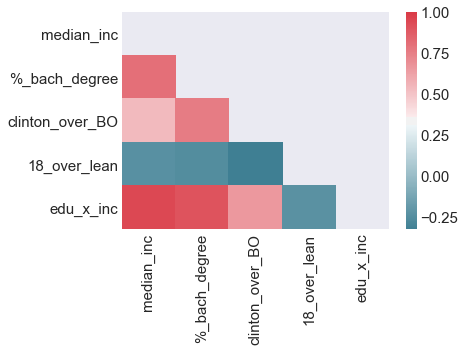

In [27]:
corr = df538.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df538.corr(), mask=mask, cmap=cmap)

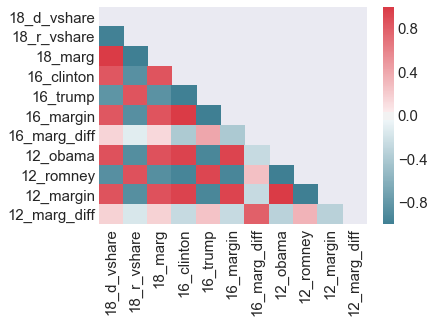

In [33]:
corr = dfkos.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

Text(0.5,1,'District Median Income By Special Election Overperformance')

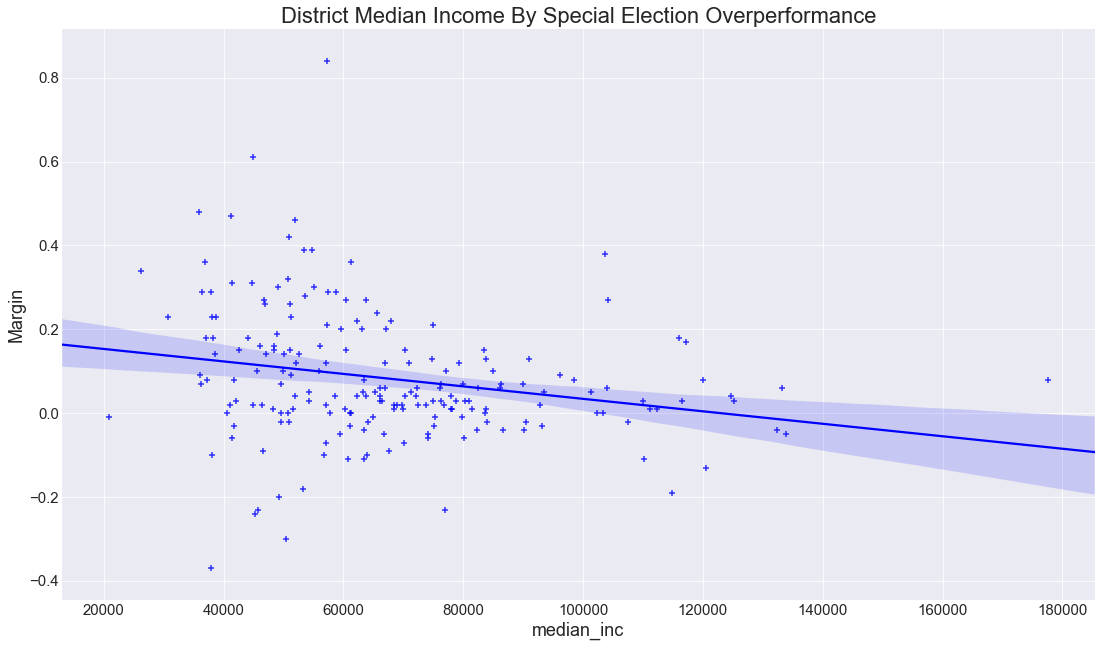

In [42]:
median = sns.regplot(x='median_inc', y='18_over_lean', data=df538, color='b', scatter=True, 
            marker='+', order=1)

fig = matplotlib.pyplot.gcf()
plt.ylabel('Margin')
fig.set_size_inches(18.5, 10.5)
plt.title('District Median Income By Special Election Overperformance', fontsize=22)

Text(0.5,1,'District Median Income By HRC Overperformance Comp to BO 2012')

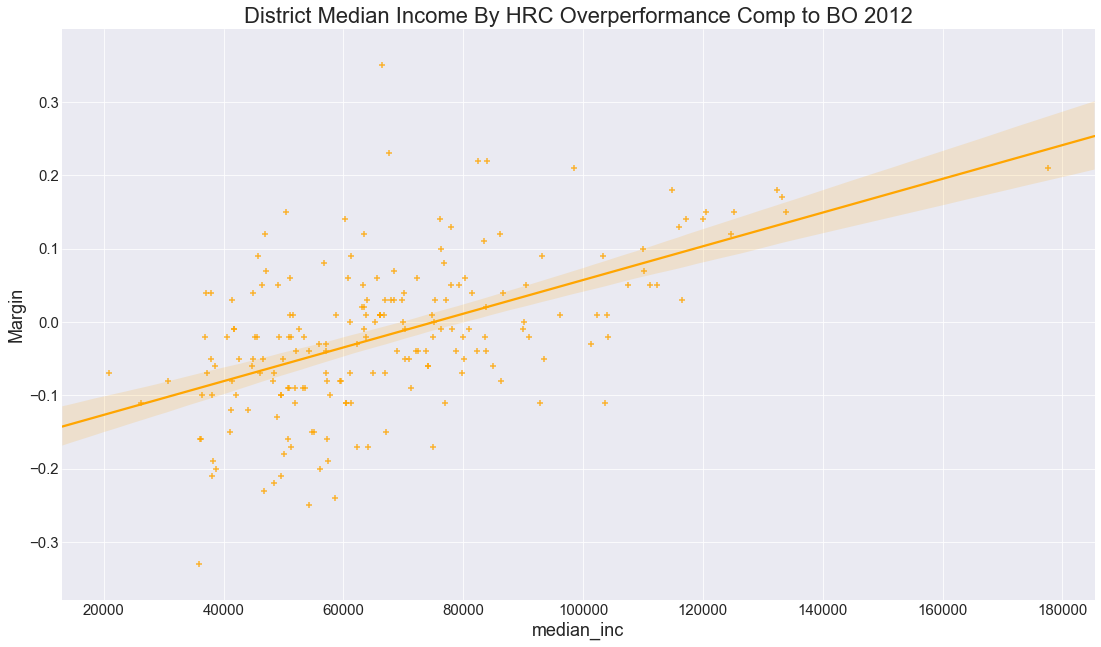

In [43]:
hrc_bo = sns.regplot(x='median_inc', y='clinton_over_BO', data=df538, color='orange', scatter=True, 
            marker='+', order=1, label='Median Income By HRC Overperformance Comp to BO 2012')
fig = matplotlib.pyplot.gcf()
plt.ylabel('Margin')
fig.set_size_inches(18.5, 10.5)
plt.title('District Median Income By HRC Overperformance Comp to BO 2012', fontsize=22)

/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:277: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


Text(0.5,1,'Interaction Vartiable Plotted Against Special Election Overperformance')

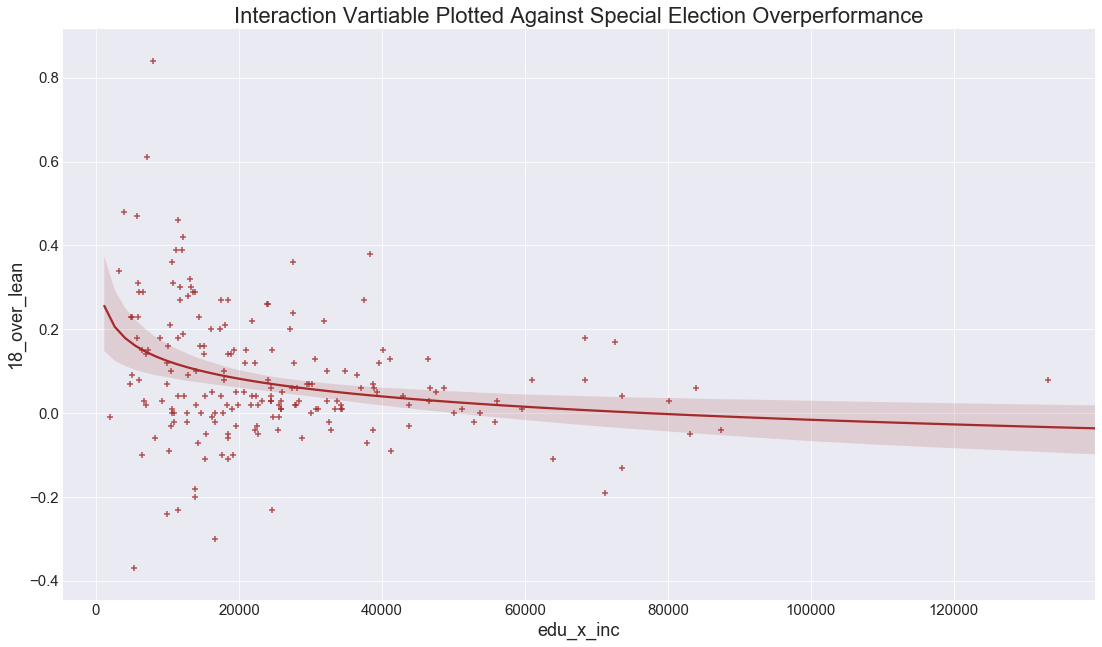

In [45]:
sns.regplot(x='edu_x_inc', y='18_over_lean', data=df538, color='brown', scatter=True, 
            marker='+', order=1, logx=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title("Interaction Vartiable Plotted Against Special Election Overperformance", fontsize=22)

In [49]:
df538.District.head()

0      HD-21
1    18th CD
2      SD-14
3      HD-51
4      HD-89
Name: District, dtype: object

In [50]:
dfkos.District.head()

0     HD-39
1    HD-114
2     AZ-08
3     SD-32
4     SD-37
Name: District, dtype: object

In [51]:
df538.set_index('District', inplace=True)
dfkos.set_index('District', inplace=True)

In [55]:
df_test = df538.merge(dfkos, how='inner', on='District')

In [57]:
df_test.columns

Index(['date_x', 'state_x', 'median_inc', '%_bach_degree', 'clinton_over_BO',
       '18_over_lean', 'edu_x_inc', 'date_y', 'state_y', 'held_by', 'winner',
       '18_d_vshare', '18_r_vshare', '18_marg', '16_clinton', '16_trump',
       '16_margin', '16_marg_diff', '12_obama', '12_romney', '12_margin',
       '12_marg_diff'],
      dtype='object')

In [56]:
df_test

,date_x,state_x,median_inc,%_bach_degree,clinton_over_BO,18_over_lean,edu_x_inc,date_y,state_y,held_by,...,18_r_vshare,18_marg,16_clinton,16_trump,16_margin,16_marg_diff,12_obama,12_romney,12_margin,12_marg_diff
District,,,,,,,,,,,,,,,,,,,,,
SD-14,2018-03-13,Tennessee,48252.0,0.22,-0.08,0.01,10615.44,2018-03-13,TN,(R),...,0.72,-0.43,0.26,0.70,-0.44,0.00,0.32,0.67,-0.35,-0.08
SD-14,2017-11-07,New Jersey,78731.0,0.41,-0.04,0.03,32279.71,2018-03-13,TN,(R),...,0.72,-0.43,0.26,0.70,-0.44,0.00,0.32,0.67,-0.35,-0.08
HD-51,2018-03-06,Oklahoma,57202.0,0.18,-0.08,0.21,10296.36,2018-03-06,OK,(R),...,0.72,-0.44,0.15,0.80,-0.65,0.21,0.22,0.78,-0.56,0.12
HD-51,2017-11-07,Virginia,111208.0,0.46,0.05,0.01,51155.68,2018-03-06,OK,(R),...,0.72,-0.44,0.15,0.80,-0.65,0.21,0.22,0.78,-0.56,0.12
HD-89,2018-02-27,Kentucky,37858.0,0.16,-0.05,0.29,6057.28,2018-02-27,KY,(R),...,0.67,-0.34,0.17,0.79,-0.62,0.28,0.21,0.77,-0.56,0.23
HD-89,2018-02-27,Kentucky,37858.0,0.16,-0.05,0.29,6057.28,2017-01-31,IA,(D),...,0.27,0.45,0.52,0.41,0.11,0.34,0.63,0.36,0.27,0.18
HD-89,2017-01-31,Iowa,50810.0,0.26,-0.16,0.32,13210.60,2018-02-27,KY,(R),...,0.67,-0.34,0.17,0.79,-0.62,0.28,0.21,0.77,-0.56,0.23
HD-89,2017-01-31,Iowa,50810.0,0.26,-0.16,0.32,13210.60,2017-01-31,IA,(D),...,0.27,0.45,0.52,0.41,0.11,0.34,0.63,0.36,0.27,0.18
HD-120,2018-02-27,Connecticut,83869.0,0.37,-0.04,0.01,31031.53,2018-02-27,CT,(R),...,0.49,0.02,0.49,0.47,0.02,0.00,0.53,0.46,0.06,-0.05


Text(0.5,1,'District By District Comparison \n Of Special Election Overperformance and HRC Performance')

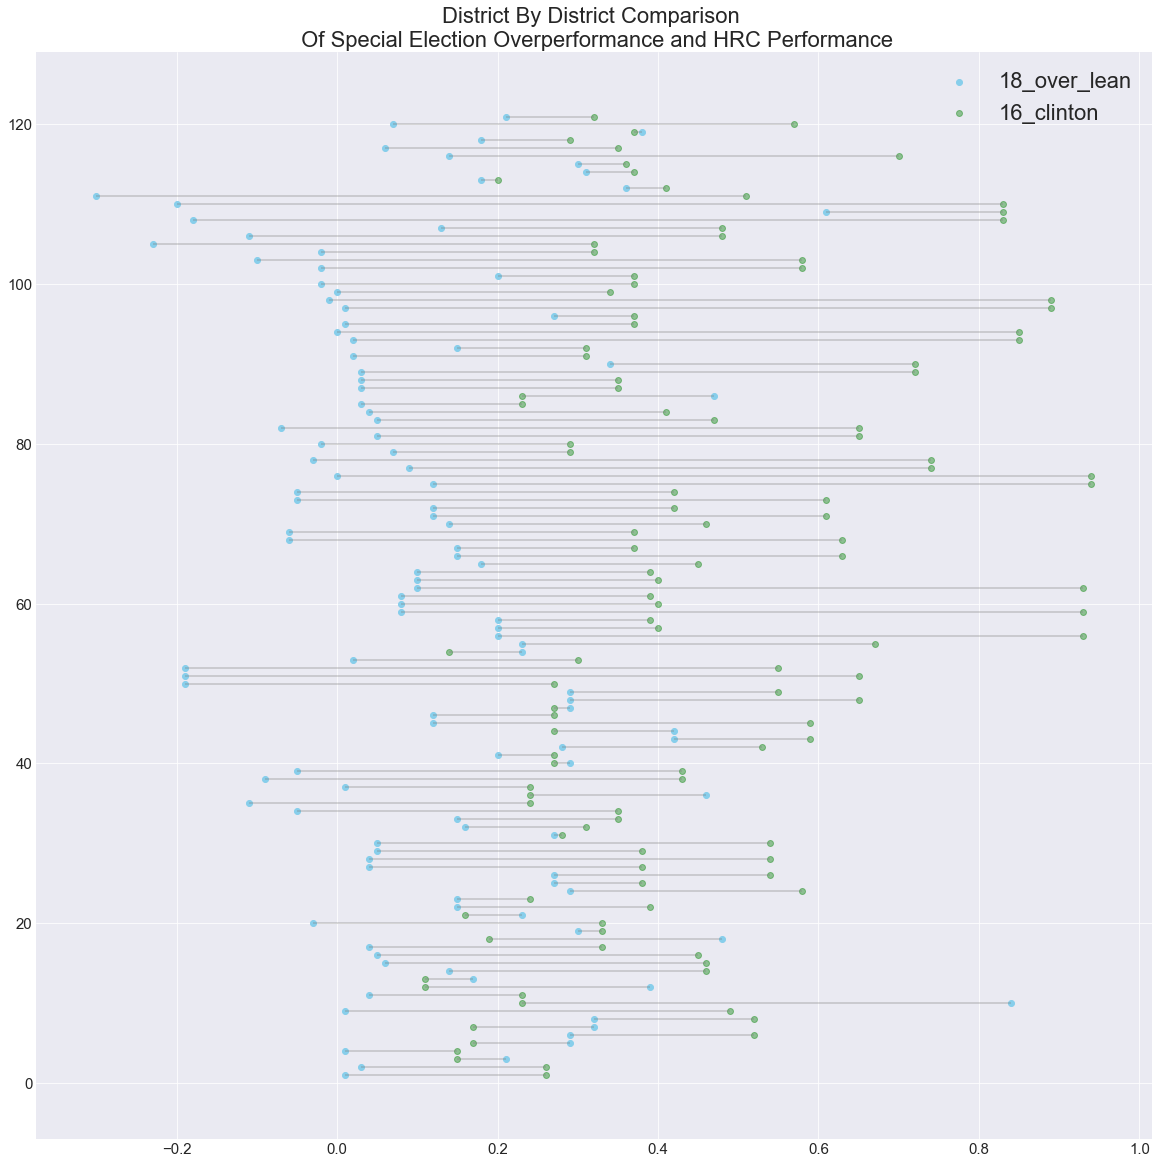

In [80]:
my_range=range(1,len(df_test.index)+1)
# I need to figure out how to label each point.

plt.hlines(y=my_range, xmin=df_test['18_over_lean'], xmax=df_test['16_clinton'], color='grey', alpha=0.4)
ax = plt.scatter(df_test['18_over_lean'], my_range, color='skyblue', alpha=1, label='18_over_lean')
plt.scatter(df_test['16_clinton'], my_range, color='green', alpha=0.4 , label='16_clinton')
plt.legend(fontsize=22)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)
plt.title("District By District Comparison \n Of Special Election Overperformance and HRC Performance", 
          fontsize=22)